In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
Data=pd.read_csv('Admission_Predict.csv')
Data


2026-01-23 11:04:46.312581: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-23 11:04:47.052676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-23 11:04:54.173119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


2.20.0


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
#Getting the Shape of the Dataset
Data.shape

(400, 9)

In [4]:
#Getting the Information about the Columns Datatype and Checking the NULL Values
Data.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
#Getting the Columns names
Data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='str')

In [6]:
Data.isnull().sum()
Data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
#checking the Duplicates Rows
Data.duplicated().sum()

np.int64(0)

In [8]:
#Printing the First % Rows From the Dataset
Data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
#Printing the Last Five rows From the Dataset
Data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [10]:
Data.drop(columns=['Serial No.'],inplace=True)

In [11]:
Data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
#Here We Are Going to Seprate the Dependent Variable ANd Independent Variable in the Dataset
X=Data.iloc[:,0:-1]
y=Data.iloc[:,-1]

In [13]:
#Getting the Indepent Variable Values
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,random_state=42,test_size=0.2)

In [16]:
#Making the All Values in the Range of 0 to 1 for Better Prediction of the Model
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X_Train_Scaled=Scaler.fit_transform(X_Train)
X_Test_Scaled=Scaler.transform(X_Test)


In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
Model=Sequential()
Model.add(Dense(7,activation='relu',input_dim=7))
Model.add(Dense(7,activation='relu'))
Model.add(Dense(1,activation='linear'))

/home/prabhakar/tfenv/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-23 11:04:58.275768: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
Model.compile(loss='mean_squared_error',optimizer='Adam')

In [21]:
History=Model.fit(X_Train_Scaled,y_Train,epochs=60,validation_split=0.2)

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 1.2530 - val_loss: 1.2958
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0843 - val_loss: 1.1244
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9421 - val_loss: 0.9787
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8232 - val_loss: 0.8568
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7249 - val_loss: 0.7573
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6443 - val_loss: 0.6757
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5774 - val_loss: 0.6092
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5223 - val_loss: 0.5535
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4759 - val_loss: 0.5063
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4366 - val_loss: 0.4652
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4022 - val_loss: 0.4276
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3706 - val_loss: 0.3936
E

In [22]:
y_preds=Model.predict(X_Test_Scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [23]:
from sklearn.metrics import r2_score
r2_score(y_preds,y_Test)

0.21343258236694684

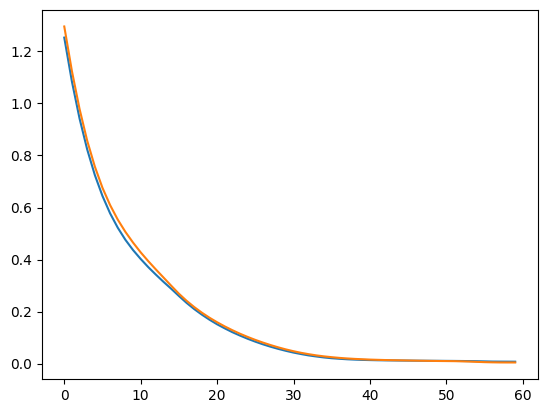

In [24]:
import matplotlib.pyplot as plt
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])